# Portfolio Optimization

In this notebook, we will begin by testing our <b>trained classification model</b> from the <b>asset selection</b> notebook on <b>real-time</b> stock data. For each class, we will then develop a <b>scoring model</b> to identify the best-performing stocks. As an example, the client will select <b>four stocks</b> for investment. We will apply <b>two asset allocation methods</b> to determine the <b>optimal portfolio</b>, and finally, compare the results to an equally-weighted portfolio and the benchmark.

## I.Importing Libraries

- These are the libraries we will be using in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import pandas_datareader as web
import yfinance as yf
import datetime as dt
import copy
import statistics
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from pypfopt import risk_models, expected_returns
from pypfopt import EfficientFrontier, plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

(CVXPY) Aug 26 10:11:40 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Aug 26 10:11:40 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


## II.Data Preparation

- Here, we will import the real-time stock data retrieved from the <b>'Dataset Real-Time'</b> notebook. <span style="color:red;">To obtain the latest stock data, please ensure that notebook is run first.</span>

In [2]:
df_stocks = pd.read_excel("stocks_Real_Time.xlsx")

In [3]:
df_stocks

,stock_name,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate
0,A,0.974865,4.226086,-62.739725,-58.793399,-38.945612,0.592689,2.899928,-0.001457
1,AA,1.554146,0.549787,-10.374677,-26.948112,-12.671785,5.603983,10.994760,0.000436
2,AACG,0.741773,-0.076579,-15.384640,-22.222233,-22.222233,6.666660,-3.030309,0.000576
3,AACI,-0.007480,0.000000,0.000000,-85.910647,-81.896862,0.000000,-14.398598,0.004500
4,AACT,0.005158,3.086534,-85.713896,-85.713896,-59.999237,-0.092939,0.093112,-0.001357
...,...,...,...,...,...,...,...,...,...
94,ADPT,1.623331,-1.149636,-8.928521,-26.086929,-19.889490,0.621122,8.724840,0.000092
95,ADRT,0.169922,0.196613,-63.888861,-77.124175,-83.064513,1.741887,-5.722669,0.043743
96,ADSE,0.247239,0.425012,-20.996444,-23.183391,-30.625008,-4.391369,0.730521,-0.002280
97,ADSK,1.354116,2.548534,-8.534614,-5.602529,-2.002263,2.832050,6.163697,-0.001472


In [4]:
df_stocks = df_stocks.set_index("stock_name")

In [5]:
X_new = df_stocks

- loading the pre-trained classification model that will be used to classify the stocks based on the imported real-time data.

In [6]:
model = joblib.load('best_Class_model.pkl')

**Scaling the Data and Making Predictions**

We will scale the stock data using <b>'StandardScaler'</b> and apply the trained model to classify each stock into a specific class. The predicted class is then added as a new column in the DataFrame.

In [7]:
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new) 

predictions = model.predict(X_new_scaled)

df_stocks['Predicted Class'] = predictions

**Filtering Stocks by Predicted Class 1**

In [8]:
class_1_stocks = df_stocks[df_stocks['Predicted Class'] == 1]
class_1_stocks

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class
stock_name,,,,,,,,,
AA,1.554146,0.549787,-10.374677,-26.948112,-12.671785,5.603983,10.994760,0.000436,1
AACG,0.741773,-0.076579,-15.384640,-22.222233,-22.222233,6.666660,-3.030309,0.000576,1
AAL,1.394638,-1.134210,-36.585286,-25.423658,-11.278167,3.383086,5.375261,0.001261,1
AAOI,1.375419,-0.424628,-0.775212,-0.657910,-0.342474,17.270536,25.452201,0.000588,1
AAON,0.904807,8.527612,-21.077571,-17.317632,-12.201788,6.607284,9.091964,-0.004710,1
AAPL,1.208004,15.928638,-33.783765,-26.881712,-5.500552,0.349477,4.901956,-0.002378,1
AAT,1.050357,-0.415634,-25.000064,-18.500042,-14.068467,4.964540,6.008756,-0.001475,1
AB,1.176099,2.872069,-40.000113,-40.000113,-14.634169,0.575376,5.016516,-0.000760,1
ABAT,1.140712,-0.519022,0.000000,-28.571380,-18.518502,3.883503,5.940600,0.001264,1


**Filtering Stocks by Predicted Class 0**

In [9]:
class_0_stocks = df_stocks[df_stocks['Predicted Class'] == 0]
class_0_stocks

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class
stock_name,,,,,,,,,
A,0.974865,4.226086,-62.739725,-58.793399,-38.945612,0.592689,2.899928,-0.001457,0
AACI,-0.007480,0.000000,0.000000,-85.910647,-81.896862,0.000000,-14.398598,0.004500,0
AACT,0.005158,3.086534,-85.713896,-85.713896,-59.999237,-0.092939,0.093112,-0.001357,0
AADI,0.578470,-1.041229,-43.396219,-42.073165,-27.165356,7.482994,13.669069,0.000983,0
AAGR,0.058335,-1.088274,-18.181843,-44.680855,-44.680855,12.195116,-1.428574,0.041107,0
AAMC,0.626241,-0.645630,-82.352966,-69.090936,-86.923089,2.597400,-19.661022,0.000262,0
AAME,0.329102,-0.407688,-75.000037,-60.000048,-61.538497,-0.645161,1.986753,0.001307,0
AAN,0.758989,-0.950258,-100.000000,-80.001144,-25.000000,0.000000,0.498994,0.000026,0
AAP,0.917987,-1.660484,-91.571426,-92.211218,-92.211218,-20.967997,-18.369038,0.003178,0


In [10]:
df_stocks

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class
stock_name,,,,,,,,,
A,0.974865,4.226086,-62.739725,-58.793399,-38.945612,0.592689,2.899928,-0.001457,0
AA,1.554146,0.549787,-10.374677,-26.948112,-12.671785,5.603983,10.994760,0.000436,1
AACG,0.741773,-0.076579,-15.384640,-22.222233,-22.222233,6.666660,-3.030309,0.000576,1
AACI,-0.007480,0.000000,0.000000,-85.910647,-81.896862,0.000000,-14.398598,0.004500,0
AACT,0.005158,3.086534,-85.713896,-85.713896,-59.999237,-0.092939,0.093112,-0.001357,0
...,...,...,...,...,...,...,...,...,...
ADPT,1.623331,-1.149636,-8.928521,-26.086929,-19.889490,0.621122,8.724840,0.000092,1
ADRT,0.169922,0.196613,-63.888861,-77.124175,-83.064513,1.741887,-5.722669,0.043743,0
ADSE,0.247239,0.425012,-20.996444,-23.183391,-30.625008,-4.391369,0.730521,-0.002280,0


**Scoring Classification Model** <br>
For each cluster, we will use the probabilities to better identify the top-performing stocks within that cluster.

In [11]:
class0_df = class_0_stocks.drop(columns=['Predicted Class'])
X_0_scaled = scaler.fit_transform(class0_df) 

y_probs_class_0 = model.predict_proba(X_0_scaled)
class_0_stocks['probability_class_0'] = y_probs_class_0[:, 0]

df_class_0_ranking = class_0_stocks.sort_values(by='probability_class_0', ascending=False)

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\4161548889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0_stocks['probability_class_0'] = y_probs_class_0[:, 0]


In [12]:
df_class_0_ranking

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class,probability_class_0
stock_name,,,,,,,,,,
ACP,0.648521,1.614798,-87.500000,-82.353057,-77.777778,-1.093753,-0.471701,0.000605,0,1.0
AAP,0.917987,-1.660484,-91.571426,-92.211218,-92.211218,-20.967997,-18.369038,0.003178,0,1.0
ADIL,0.631592,-0.756893,-79.999952,-66.666634,-66.666634,0.000000,-2.020200,0.000276,0,1.0
ACHL,0.621626,-1.417813,-62.069022,-62.069022,-75.280946,1.643831,-3.886014,0.000200,0,1.0
ABTS,1.240590,-0.460677,-79.999988,-83.471068,-77.706990,-11.818181,-0.205759,0.000171,0,1.0
AACI,-0.007480,0.000000,0.000000,-85.910647,-81.896862,0.000000,-14.398598,0.004500,0,1.0
ACAC,-0.002789,2.465220,-71.326158,-71.326158,-71.326158,1.474415,1.739129,-0.002492,0,1.0
AAMC,0.626241,-0.645630,-82.352966,-69.090936,-86.923089,2.597400,-19.661022,0.000262,0,1.0
ACIU,0.945306,-0.838245,-85.714302,-86.956535,-91.044786,-8.605340,-6.097562,-0.000603,0,1.0


- These are the stocks classified as <b>'Defensive or Recovering Stocks'</b>(Class 0), sorted by predicted probability from highest to lowest.

In [13]:
class1_df = class_1_stocks.drop(columns=['Predicted Class'])
X_1_scaled = scaler.fit_transform(class1_df) 

y_probs_class_1 = model.predict_proba(X_1_scaled)
class_1_stocks['probability_class_1'] = y_probs_class_1[:, 1]

df_class_1_ranking = class_1_stocks.sort_values(by='probability_class_1', ascending=False)

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\2684267661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1_stocks['probability_class_1'] = y_probs_class_1[:, 1]


In [14]:
df_class_1_ranking

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class,probability_class_1
stock_name,,,,,,,,,,
ABT,0.788498,3.085378,-4.285543,-2.980015,-1.587238,1.522525,3.661120,-0.001162,1,1.0
ACGL,0.975274,9.876026,-2.103639,-1.585425,-1.000038,6.309111,10.355295,-0.005121,1,1.0
ACA,1.136077,5.698769,-7.097739,-5.256975,-2.572882,9.263686,12.393953,-0.004078,1,1.0
AC,0.883013,-0.042684,0.000000,0.000000,-2.427148,4.102412,0.506248,0.000807,1,1.0
ACRV,0.470685,-0.419177,-7.362010,-2.419372,-2.352957,23.157892,21.716510,-0.001153,1,1.0
ABSI,1.544284,-0.817911,-2.747317,-1.315820,-0.943418,11.970063,21.680209,-0.000401,1,1.0
ACHC,1.162804,4.525904,-3.337939,-3.145448,-2.037334,7.304958,11.637331,-0.000464,1,1.0
ACIW,1.124057,2.148939,-2.272777,-1.403540,-0.675691,4.168420,6.203047,-0.003379,1,1.0
ACU,0.376370,4.965679,0.000000,0.000000,0.000000,7.346432,13.098621,-0.002881,1,1.0


- These are the stocks classified as <b>'Growth-Oriented Stocks'</b>(Class 1), sorted by predicted probability from highest to lowest.

## III.Stocks Performance Overview

- We will select a class based on the client's objectives. In this example, we assume the client's goal is to focus on <b>'Growth-Oriented Stocks'</b>, represented by <b>class 1</b>, and he has decided to invest in <b>4 stocks</b>.

In [15]:
df_stocks_best = df_class_1_ranking.head(4)

In [16]:
df_stocks_best

,Beta,Sharpe ratio,WR3,WR7,WR14,ROC5,ROC10,Future Change Rate,Predicted Class,probability_class_1
stock_name,,,,,,,,,,
ABT,0.788498,3.085378,-4.285543,-2.980015,-1.587238,1.522525,3.661120,-0.001162,1,1.0
ACGL,0.975274,9.876026,-2.103639,-1.585425,-1.000038,6.309111,10.355295,-0.005121,1,1.0
ACA,1.136077,5.698769,-7.097739,-5.256975,-2.572882,9.263686,12.393953,-0.004078,1,1.0
AC,0.883013,-0.042684,0.000000,0.000000,-2.427148,4.102412,0.506248,0.000807,1,1.0


We will reset the index to simplify the import of real-time data for each of these 4 stocks from the <b>yfinance</b> library, using the `stock_name` column.

In [17]:
df_stocks_best = df_stocks_best.reset_index()

In [18]:
start = dt.datetime(2019,1,1)
end = dt.datetime.today()

stocks = df_stocks_best['stock_name']
dfs = []
for company in stocks:
    data = yf.download(company, start=start, end=end)
    dfs.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
dfs[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,70.389999,70.959999,69.070000,69.500000,62.953049,8737200
2019-01-03,68.739998,68.879997,65.500000,66.220001,59.982033,10570700
2019-01-04,67.120003,68.580002,66.989998,68.110001,61.693985,8299100
2019-01-07,68.190002,69.860001,68.180000,69.129997,62.617905,9503000
2019-01-08,69.550003,69.639999,67.000000,68.300003,61.866112,8905100
...,...,...,...,...,...,...
2024-08-19,111.000000,112.250000,110.839996,111.900002,111.900002,3495800
2024-08-20,111.820000,112.089996,110.330002,110.769997,110.769997,5822400
2024-08-21,110.970001,111.449997,110.680000,111.389999,111.389999,4081400


To better <b>visualize</b> the prices of these stocks, we will construct a DataFrame where each column represents a stock and contains its adjusted close values, indexed by date.

In [20]:
for i in range (0,int((len(stocks)))):
    dfs[i] = dfs[i][['Adj Close']]

In [21]:
dfs_mrg = copy.deepcopy(dfs)
for i in range(0,len(stocks)):
    dfs_mrg[i].rename(columns={'Adj Close': stocks[i]}, inplace=True)

merged_df = dfs_mrg[0]

for df in dfs_mrg[1:]:
    merged_df = merged_df.join(df, how='outer', rsuffix='_' + df.columns[0])

In [22]:
merged_df

,ABT,ACGL,ACA,AC
Date,,,,
2019-01-02,62.953049,26.190001,27.616241,34.419228
2019-01-03,59.982033,25.780001,27.635788,34.921413
2019-01-04,61.693985,26.389999,28.349159,34.766895
2019-01-07,62.617905,26.330000,29.756359,36.746677
2019-01-08,61.866112,26.430000,29.531595,36.939827
...,...,...,...,...
2024-08-19,111.900002,103.000000,86.669998,32.419998
2024-08-20,110.769997,102.800003,86.019997,32.384998
2024-08-21,111.389999,104.599998,87.370003,32.500000


- Removing any missing values, if present

In [23]:
merged_df = merged_df.dropna()
merged_df

,ABT,ACGL,ACA,AC
Date,,,,
2019-01-02,62.953049,26.190001,27.616241,34.419228
2019-01-03,59.982033,25.780001,27.635788,34.921413
2019-01-04,61.693985,26.389999,28.349159,34.766895
2019-01-07,62.617905,26.330000,29.756359,36.746677
2019-01-08,61.866112,26.430000,29.531595,36.939827
...,...,...,...,...
2024-08-19,111.900002,103.000000,86.669998,32.419998
2024-08-20,110.769997,102.800003,86.019997,32.384998
2024-08-21,111.389999,104.599998,87.370003,32.500000


- We will keep a copy of this DataFrame, as we will need it later.

In [24]:
merged_df2 = merged_df.copy()

In [25]:
merged_df2

,ABT,ACGL,ACA,AC
Date,,,,
2019-01-02,62.953049,26.190001,27.616241,34.419228
2019-01-03,59.982033,25.780001,27.635788,34.921413
2019-01-04,61.693985,26.389999,28.349159,34.766895
2019-01-07,62.617905,26.330000,29.756359,36.746677
2019-01-08,61.866112,26.430000,29.531595,36.939827
...,...,...,...,...
2024-08-19,111.900002,103.000000,86.669998,32.419998
2024-08-20,110.769997,102.800003,86.019997,32.384998
2024-08-21,111.389999,104.599998,87.370003,32.500000


Now, we will plot the adjusted close prices for each stock.

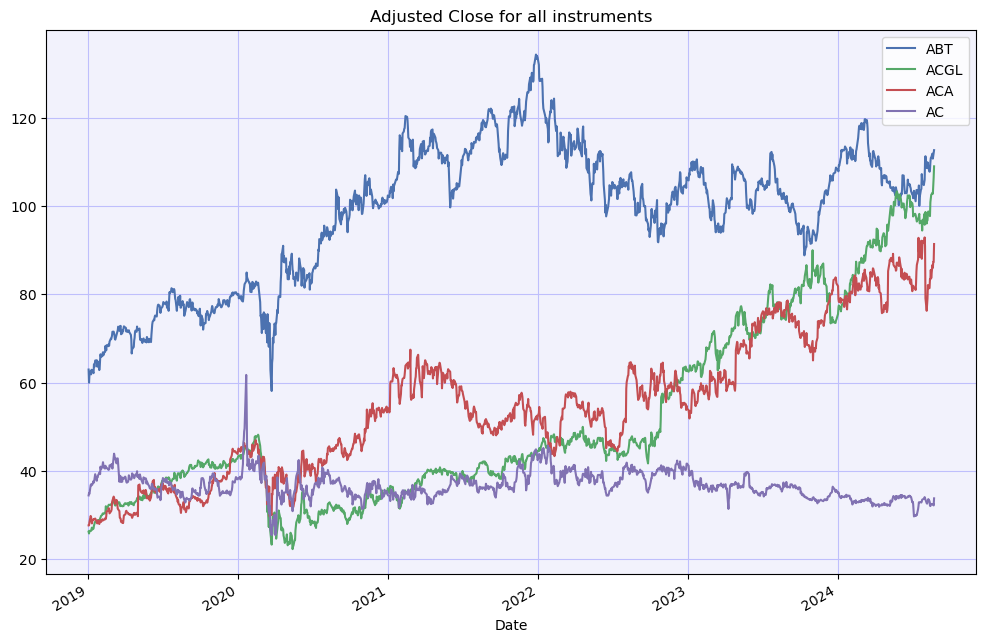

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
merged_df.plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for all instruments')
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))

**Return Calculation**

- <b>Daily</b> : simple return

In [27]:
log_returns = pd.DataFrame()

for i in range (0,int((len(stocks)))):
    log_returns = dfs[i]['Adj Close'].pct_change()
    dfs[i]['Simple Daily Returns'] = log_returns

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\3607045004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Simple Daily Returns'] = log_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\3607045004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Simple Daily Returns'] = log_returns


Loops through each stock's DataFrame in the list <b>dfs</b> to calculate the percentage change in adjusted close prices, which is stored as <b>'Simple Daily Returns'</b> in each DataFrame.

In [28]:
dfs[0]

,Adj Close,Simple Daily Returns
Date,,
2019-01-02,62.953049,NaN
2019-01-03,59.982033,-0.047194
2019-01-04,61.693985,0.028541
2019-01-07,62.617905,0.014976
2019-01-08,61.866112,-0.012006
...,...,...
2024-08-19,111.900002,0.008108
2024-08-20,110.769997,-0.010098
2024-08-21,111.389999,0.005597


In [29]:
for i in range (0,int((len(stocks)))):
    df_cum_daily_returns = (1 + dfs[i]['Simple Daily Returns']).cumprod() - 1 
    dfs[i]['Cum Daily Returns'] = df_cum_daily_returns

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\4760096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Cum Daily Returns'] = df_cum_daily_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\4760096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Cum Daily Returns'] = df_cum_daily_returns


Loops through each stock's DataFrame to calculate the cumulative daily returns from the simple daily returns, which is then added to each DataFrame as <b>'Cum Daily Returns'</b>.

In [30]:
dfs[0]

,Adj Close,Simple Daily Returns,Cum Daily Returns
Date,,,
2019-01-02,62.953049,NaN,NaN
2019-01-03,59.982033,-0.047194,-0.047194
2019-01-04,61.693985,0.028541,-0.020000
2019-01-07,62.617905,0.014976,-0.005324
2019-01-08,61.866112,-0.012006,-0.017266
...,...,...,...
2024-08-19,111.900002,0.008108,0.777515
2024-08-20,110.769997,-0.010098,0.759565
2024-08-21,111.389999,0.005597,0.769414


In [31]:
perc_returns = []

for i in range (0,int((len(stocks)))):
    df_ret = dfs[i]['Adj Close']
    value = ((df_ret.iloc[-1] - df_ret.iloc[0]) / df_ret.iloc[0])*100
    perc_returns.append(value)

perc_returns

[79.00642583266657, 316.2657289804031, 231.00088515231582, -1.9443422957456415]

For each stock, we calculate the percentage return based on the adjusted close price from the first and last data points, and appends it to <b>perc_returns</b>.

In [32]:
dfs_ind = []

for i in range (0,int((len(stocks)))):
    df = pd.DataFrame({ 'Percentage Return': perc_returns[i] }, index=[stocks[i]])
    dfs_ind.append(df)

dfs_mrg = copy.deepcopy(dfs)
for i in range(0,len(stocks)):
    dfs_mrg[i].rename(columns={'Adj Close': stocks[i]}, inplace=True)


merged_df = dfs_mrg[0]


for df in dfs_mrg[1:]:
    merged_df = merged_df.join(df, how='outer', rsuffix='_' + df.columns[0])

- Makes a deep copy of the list dfs into dfs_mrg to preserve the original DataFrames.
- Renames the `Adj Close` column to the stock name in each DataFrame within <b>dfs_mrg</b>.
- Merges these DataFrames into a single DataFrame <b>merged_df</b>, joining them on their indices.

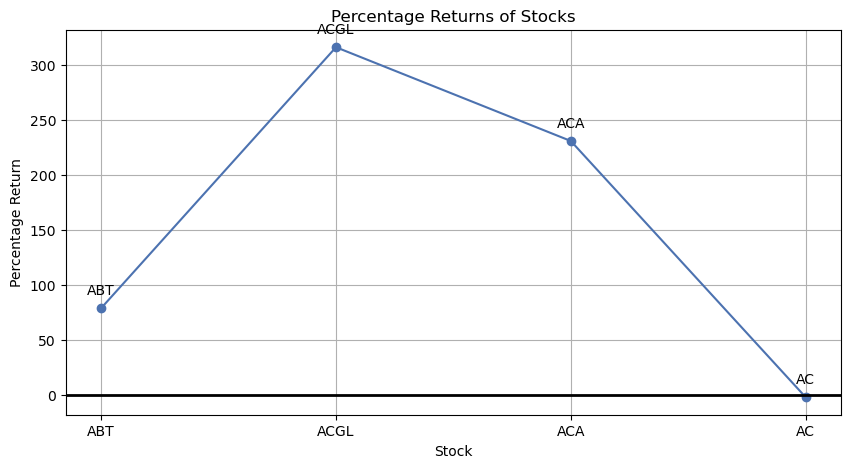

In [33]:
perc_returns_series = pd.Series(perc_returns, index=stocks)

plt.figure(figsize=(10, 5))
plt.plot(perc_returns_series, marker='o', linestyle='-')

plt.grid(True)

plt.axhline(y=0, color="black", lw=2)

for i, txt in enumerate(perc_returns_series.index):
    plt.annotate(txt, (perc_returns_series.index[i], perc_returns_series[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Percentage Returns of Stocks')
plt.xlabel('Stock')
plt.ylabel('Percentage Return')
plt.show()

- Converts `perc_returns` into a Series with stock names as the index.
- Creates a plot with the <b>percentage returns</b>, using markers and lines for visualization.
- Adds grid lines, a horizontal line at y=0, and annotations for each data point to the plot.
- Sets the plot title and axis labels, then displays the plot.

**Volatility Calculation**

- <b>Daily</b> : risks

We will calculate the daily volatility for each stock based on the standard deviation of the simple daily returns. The results are stored in a list called `daily_volatility`.

In [34]:
daily_volatility = []

for i in range(0,int((len(stocks)))):
    volatility_daily = statistics.stdev(dfs[i]['Simple Daily Returns'][1:])
    daily_volatility.append(volatility_daily)

daily_volatility

[0.016130710993516328,
 0.02017296148859172,
 0.025534784057842642,
 0.028695186654880238]

We will display the daily volatility for each stock. The output includes the stock name followed by its respective daily volatility value.

In [35]:
print("-"*80)
for i in range(0,int((len(stocks)))):
    print("Stock : ",stocks[i])
    display(daily_volatility[i])
    print("-"*80)

--------------------------------------------------------------------------------
Stock :  ABT


0.016130710993516328

--------------------------------------------------------------------------------
Stock :  ACGL


0.02017296148859172

--------------------------------------------------------------------------------
Stock :  ACA


0.025534784057842642

--------------------------------------------------------------------------------
Stock :  AC


0.028695186654880238

--------------------------------------------------------------------------------


- <b>Annualize</b> the Daily Volatility

Here, we compute the number of <b>trading days</b> per year for each stock. This is done by grouping the adjusted close prices by year and counting the number of data points. The results are stored in a list called `tr_days_per_year`.

In [36]:
tr_days_per_year = []

for i in range(0,int((len(stocks)))):
    tr_dys_pr_year = dfs[i]['Adj Close'].groupby([dfs[i]['Adj Close'].index.year]).agg('count')
    tr_dys_pr_year = pd.DataFrame([tr_dys_pr_year], index = [f"For {stocks[i]} stock"])
    tr_days_per_year.append(tr_dys_pr_year)

    
print('='*50)
for i in range(0,int((len(stocks)))):
    display(tr_days_per_year[i])
    print('='*50)

Date,2019,2020,2021,2022,2023,2024
For ABT stock,252,253,252,251,250,163


Date,2019,2020,2021,2022,2023,2024
For ACGL stock,252,253,252,251,250,163


Date,2019,2020,2021,2022,2023,2024
For ACA stock,252,253,252,251,250,163


Date,2019,2020,2021,2022,2023,2024
For AC stock,252,253,252,251,250,163


- Based on these results we will work with <b>252</b> trading days

**Convert to perentage**

We will compute the <b>annualized risk percentage</b> for each stock. This is derived from the daily volatility, annualized using the square root of <b>252 trading days</b>. The results are stored in a list called `perc_risks`.

In [37]:
perc_risks = []

for i in range(0,int((len(stocks)))):
    volatility_daily_value = statistics.stdev(dfs[i]['Simple Daily Returns'][1:])
    AnnualizedDailyVolatilityTradingDays_value = volatility_daily_value*np.sqrt(252)
    perc_risks.append(AnnualizedDailyVolatilityTradingDays_value*100)

perc_risks

[25.6067098556999, 32.02358358389822, 40.535213039273025, 45.552196628035524]

Here, we plot the <b>annualized risk percentage</b> for each stock. The plot includes markers and lines to represent the risk percentage, with annotations for each stock.

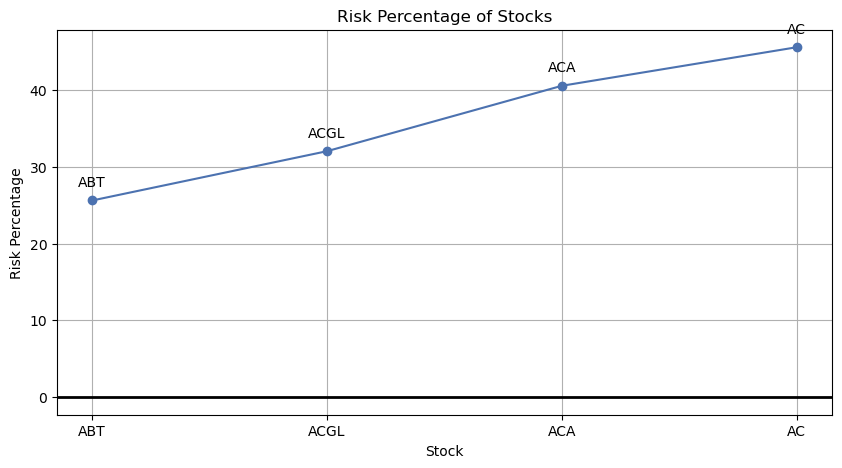

In [38]:
perc_risks_series = pd.Series(perc_risks, index=stocks)

plt.figure(figsize=(10, 5))
plt.plot(perc_risks_series, marker='o', linestyle='-')

plt.grid(True)

plt.axhline(y=0, color="black", lw=2)

for i, txt in enumerate(perc_risks_series.index):
    plt.annotate(txt, (perc_risks_series.index[i], perc_risks_series[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Risk Percentage of Stocks')
plt.xlabel('Stock')
plt.ylabel('Risk Percentage')
plt.show()

**Returns VS Risks**

Here, we create a comparative plot of returns and risks. The percentage returns are shown in blue, while the percentage risks are displayed in red.

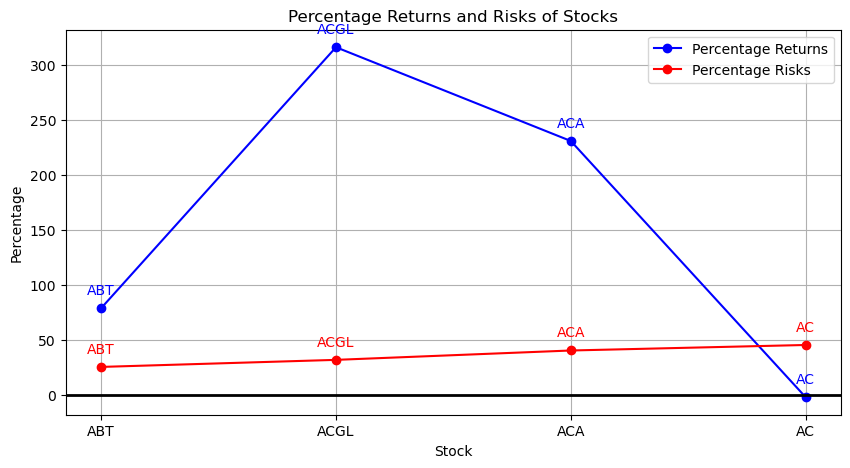

In [39]:
perc_returns_series = pd.Series(perc_returns, index=stocks)
perc_risks_series = pd.Series(perc_risks, index=stocks)

plt.figure(figsize=(10, 5))

plt.plot(perc_returns_series, marker='o', linestyle='-', color='blue', label='Percentage Returns')
plt.plot(perc_risks_series, marker='o', linestyle='-', color='red', label='Percentage Risks')

plt.grid(True)

plt.axhline(y=0, color="black", lw=2)

for i, txt in enumerate(perc_returns_series.index):
    plt.annotate(txt, (perc_returns_series.index[i], perc_returns_series[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for i, txt in enumerate(perc_risks_series.index):
    plt.annotate(txt, (perc_risks_series.index[i], perc_risks_series[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.title('Percentage Returns and Risks of Stocks')
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.legend()
plt.show()

## IV.Asset Allocation

 **Method 1 : Random weights**

In this method, we generate **random** portfolio weights and compute the expected portfolio **returns, volatility, and Sharpe ratio**. The random weights are normalized to sum to 1, and the results are displayed in DataFrames for easy reference.

In [40]:
log_return = np.log(1 + merged_df2.pct_change())

random_weights = np.array(np.random.random(len(stocks)))

rebalance_weights = random_weights / np.sum(random_weights)

exp_ret = np.sum((log_return.mean() * rebalance_weights) * 252)

exp_vol = np.sqrt(
np.dot(
    rebalance_weights.T,
    np.dot(
        log_return.cov() * 252,
        rebalance_weights
    )
)
)

sharpe_ratio = exp_ret / exp_vol

weights_df = pd.DataFrame(data={
'random_weights': random_weights,
'rebalance_weights': rebalance_weights
})
print('')
print('='*80)
print('PORTFOLIO WEIGHTS:')
print('-'*80)
print(weights_df)
print('-'*80)

metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_ret,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('')
print('='*80)
print('PORTFOLIO METRICS:')
print('-'*80)
print(metrics_df)
print('-'*80)


PORTFOLIO WEIGHTS:
--------------------------------------------------------------------------------
   random_weights  rebalance_weights
0        0.862286           0.310803
1        0.795248           0.286640
2        0.538099           0.193953
3        0.578751           0.208605
--------------------------------------------------------------------------------

PORTFOLIO METRICS:
--------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  \
0                    0.145133                       0.243227   

   Portfolio Sharpe Ratio  
0                0.596698  
--------------------------------------------------------------------------------


Here, we simulate <b>10,000 portfolios</b> with randomly generated weights. For each portfolio, we calculate the expected returns, volatility, and Sharpe ratio, storing the results in a DataFrame. This simulation helps in understanding the range of possible portfolio performances.

In [41]:
num_of_portfolios = 10000

all_weights = np.zeros((num_of_portfolios, len(stocks)))

ret_arr = np.zeros(num_of_portfolios)

vol_arr = np.zeros(num_of_portfolios)

sharpe_arr = np.zeros(num_of_portfolios)


for ind in range(num_of_portfolios):

    weights = np.array(np.random.random(len(stocks)))
    weights = weights / np.sum(weights)

    all_weights[ind, :] = weights

    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

simulations_df = pd.DataFrame(data=simulations_data).T


simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]


simulations_df = simulations_df.infer_objects()

print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)


SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0  0.120194    0.247794      0.485053   
1  0.157113    0.243578      0.645022   
2  0.177212    0.258504      0.685527   
3  0.139358    0.262685      0.530514   
4  0.114814    0.275116      0.417329   

                                   Portfolio Weights  
0  [0.3869527588284762, 0.08519315380044443, 0.28...  
1  [0.37384371013548584, 0.21387831826745138, 0.3...  
2  [0.1792805394286265, 0.42556244093236234, 0.24...  
3  [0.19820631235272268, 0.24324257222182624, 0.2...  
4  [0.21390431762928686, 0.10552142550277573, 0.3...  
--------------------------------------------------------------------------------


- The maximum Sharpe ratio

In [42]:
sharpe_arr.max()

0.7988761066661092

- These are the weights of that maximum sharpe ratio

In [43]:
all_weights[sharpe_arr.argmax(), :]

array([0.08152953, 0.63950566, 0.27662481, 0.00234   ])

We defined this function to <b>round portfolio weights</b> to the nearest whole number. This function will be useful for visualizing the portfolio allocation in a pie chart.

In [44]:
def custom_round(number):
    integer_part = int(number)
    fractional_part = number - integer_part
    
    if fractional_part >= 0.5:
        return integer_part + 1
    else:
        return integer_part

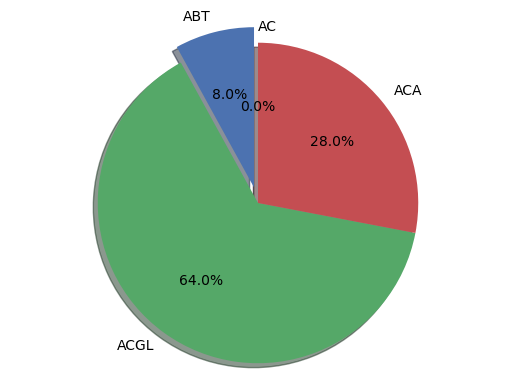

In [45]:
labels = stocks
sizes = [custom_round(all_weights[sharpe_arr.argmax(),0]*100), custom_round(all_weights[sharpe_arr.argmax(),1]*100), custom_round(all_weights[sharpe_arr.argmax(),2]*100), custom_round(all_weights[sharpe_arr.argmax(),3]*100)]
explode = (0.1, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Finally, this pie chart shows <b>the allocation of the portfolio</b> with the <b>highest Sharpe ratio</b> from the simulations. It displays the percentage weight of each stock, with the largest allocation highlighted.

**Method 2 : Using pypfopt library (Efficient Frontier)**

In this method we will use the `PyPortfolioOpt` library to optimize the portfolio based on historical returns and covariance. We compute the optimal weights for <b>maximizing</b> the Sharpe ratio and <b>adjust</b> them according to given <b>probabilities</b>. The weights are normalized and used for further analysis.

Optimized Weights:
 OrderedDict([('ABT', 0.0), ('ACGL', 0.84255), ('ACA', 0.15745), ('AC', 0.0)])
Expected annual return: 28.0%
Annual volatility: 30.5%
Sharpe Ratio: 0.85

Discrete Allocation:
 {'ACGL': 773, 'ACA': 172}
Funds remaining: $5.02


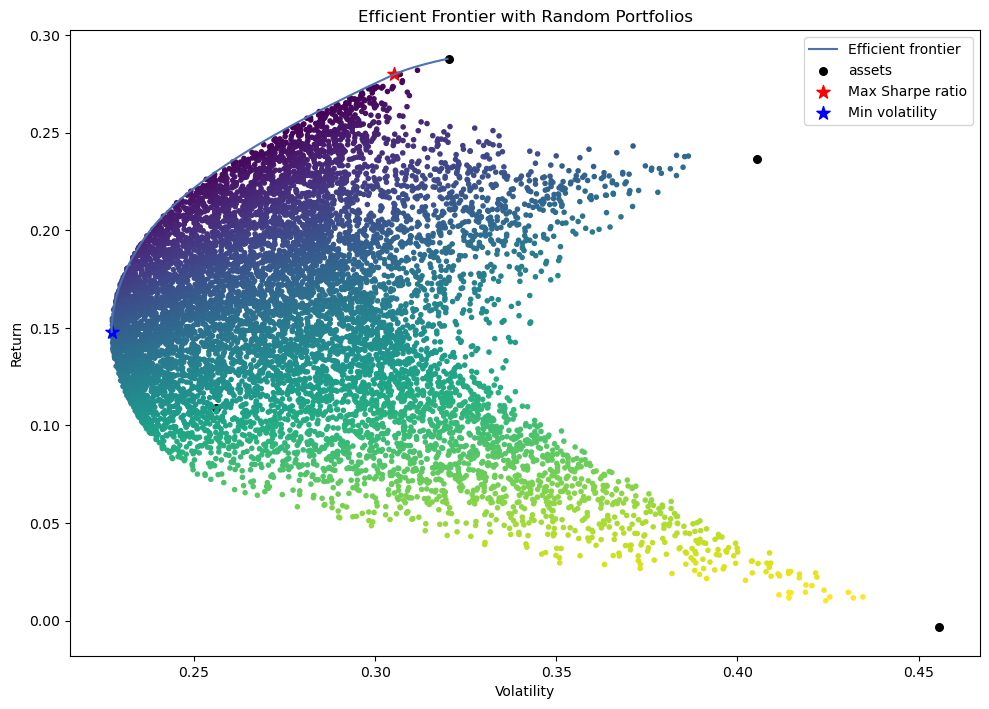

In [46]:
df_stocks_best = df_stocks_best.set_index("stock_name")

# Filter and reorder columns in `merged_df2` based on `df_stocks_best` index
merged_df2_sorted = merged_df2[df_stocks_best.index]

# Now proceed with the calculations using `merged_df2_sorted`
# Calculate daily returns
returns = merged_df2_sorted.pct_change().dropna()

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(merged_df2_sorted)
S = risk_models.sample_cov(merged_df2_sorted)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

# Adjust weights by the probabilities (normalize probabilities if needed)
adjusted_weights = {stock: weights[stock] * prob for stock, prob in zip(df_stocks_best.index, df_stocks_best['probability_class_1'])}
total_weight = sum(adjusted_weights.values())
normalized_weights = {stock: weight / total_weight for stock, weight in adjusted_weights.items()}

# Update portfolio weights with adjusted weights
ef.set_weights(normalized_weights)
cleaned_weights = ef.clean_weights()

# Print the optimized weights
print("Optimized Weights:\n", cleaned_weights)

# Get the performance of the optimized portfolio
performance = ef.portfolio_performance(verbose=True)

# Discrete allocation (if you have a total portfolio value, e.g., $100,000)
latest_prices = get_latest_prices(merged_df2_sorted)
total_portfolio_value = 100000  # Example portfolio value
da = DiscreteAllocation(normalized_weights, latest_prices, total_portfolio_value=total_portfolio_value)
allocation, leftover = da.lp_portfolio()
print("\nDiscrete Allocation:\n", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

# Plot the efficient frontier
plt.figure(figsize=(10, 7))
ef = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(ef, show_assets=True)

# Add random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(merged_df2_sorted.shape[1]), n_samples)
rets = w.dot(mu)
vols = np.sqrt(np.diag(w @ S @ w.T))
sharpe_ratios = rets / vols
plt.scatter(vols, rets, marker='.', c=sharpe_ratios, cmap='viridis_r')

# Find the maximum Sharpe ratio portfolio
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ret, vol, _ = ef.portfolio_performance()
plt.scatter(vol, ret, marker='*', color='r', s=100, label='Max Sharpe ratio')

# Find the minimum volatility portfolio
ef = EfficientFrontier(mu, S)
ef.min_volatility()
ret, vol, _ = ef.portfolio_performance()
plt.scatter(vol, ret, marker='*', color='b', s=100, label='Min volatility')

plt.title('Efficient Frontier with Random Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

we plotted the <b>efficient frontier</b> along with randomly generated portfolios to visualize the risk-return trade-off. The plot includes markers for portfolios with the <b>maximum Sharpe ratio</b> and <b>minimum volatility</b>, providing insights into optimal portfolio choices.

In [47]:
cleaned_weights

OrderedDict([('ABT', 0.0), ('ACGL', 0.84255), ('ACA', 0.15745), ('AC', 0.0)])

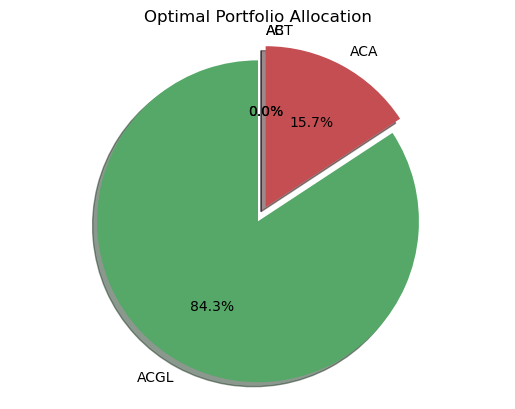

In [48]:
labels = list(cleaned_weights.keys())
sizes = [weight * 100 for weight in cleaned_weights.values()]
explode = [0.1 if i == sizes.index(max(sizes)) else 0 for i in range(len(sizes))]  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title('Optimal Portfolio Allocation')
plt.show()

Finally, this pie chart visualizes the <b>optimal portfolio</b> allocation derived from the `PyPortfolioOpt` optimization. It displays the percentage weight of each stock in the optimized portfolio, with the largest allocation highlighted.

## V.Portfolio Comparison

**Comparison with the Benchmark** <br>
Here, we use the S&P 500 stock to benchmark returns against both the equal-weighted portfolio and our optimized portfolio.

In [49]:
sp500_ticker = '^GSPC'

start = dt.datetime(2019,1,1)
end = dt.datetime.today()

sp500_data = yf.download(sp500_ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [50]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000
...,...,...,...,...,...,...
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000
2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000


In [51]:
sp500_data = sp500_data[['Adj Close']]

In [52]:
sp500_data.rename(columns={'Adj Close': 's&p500'}, inplace=True)

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_4228\3357597685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_data.rename(columns={'Adj Close': 's&p500'}, inplace=True)


In [53]:
sp500_data

,s&p500
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912
...,...
2024-08-19,5608.250000
2024-08-20,5597.120117
2024-08-21,5620.850098


Using the previous copy of the `merged_df` dataframe, we will calculate the <b>returns</b> for both the selected stocks and the benchmark.

In [54]:
returns = merged_df2.pct_change().dropna()
benchmark_returns = sp500_data['s&p500'].pct_change().dropna()

- These are the optimal weights we found earlier

In [55]:
weights

OrderedDict([('ABT', 0.0),
             ('ACGL', 0.8425473887619102),
             ('ACA', 0.1574526112380899),
             ('AC', 0.0)])

In [56]:
num_stocks = len(stocks)
weight = 1 / num_stocks

equal_weights = OrderedDict((name, weight) for name in stocks)

We calculate the cumulative returns for three different portfolios: <b>the optimal portfolio</b>, an <b>equal-weighted portfolio</b>, and a <b>benchmark (S&P 500)</b>. The cumulative returns are computed by taking the dot product of the returns with the portfolio weights and applying the cumulative product function. We then plot these <b>cumulative returns</b> over time for comparison.

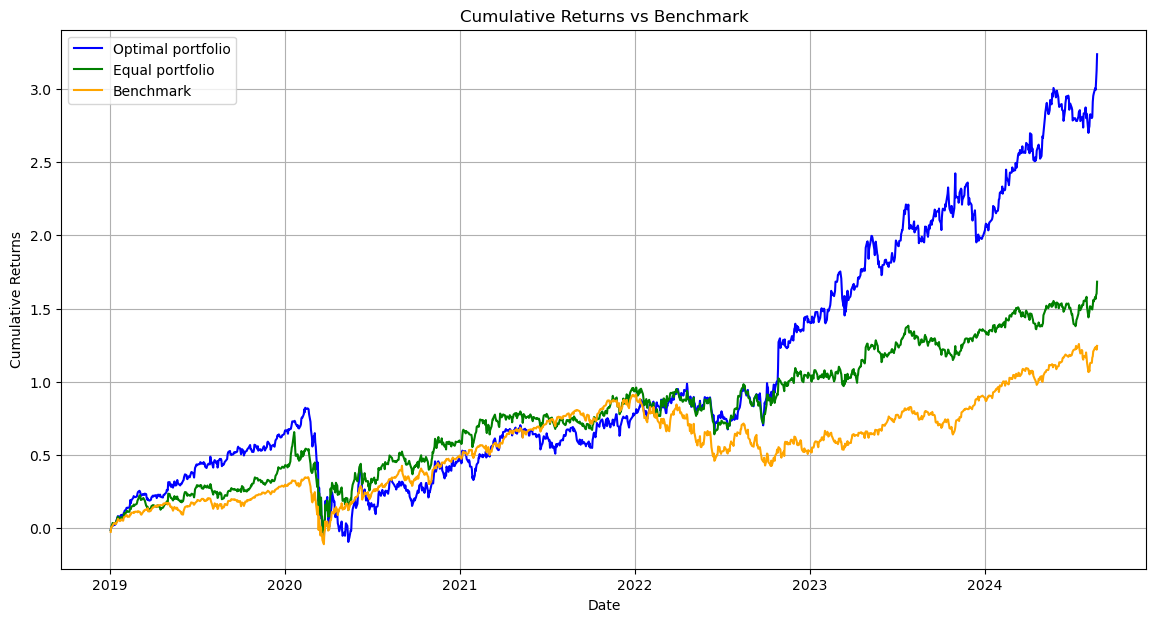

In [57]:
cumulative_returns_portfolio = (1 + returns.dot(pd.Series(cleaned_weights))).cumprod() - 1
cumulative_returns_equal_portfolio = (1 + returns.dot(pd.Series(equal_weights))).cumprod() - 1
cumulative_returns_benchmark = (1 + benchmark_returns).cumprod() - 1

plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_portfolio, label='Optimal portfolio', color='blue')
plt.plot(cumulative_returns_equal_portfolio, label='Equal portfolio', color='green')
plt.plot(cumulative_returns_benchmark, label='Benchmark', color='orange')
plt.title('Cumulative Returns vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

 The plot shows how the performance of the optimal portfolio stacks up against both the equal-weighted portfolio and the benchmark.

&rArr; We can observe that the <b>optimal portfolio</b> generally <b>outperforms</b> the others, particularly from the year <b>2023 onwards</b>.